In [7]:
import numpy as np

import matplotlib.pyplot as plt


In [29]:
Fcr=5
Fpc=7
f0=1/2
finf=1/4
k0=5
r0=1/2
alphaR=2/3
r=3/4
beta=1/2
alphaL=alphaR
deltaP=deltaC=0.74
ec=10
ep=1/2
mc=60
mp=60
mr=60





In [30]:


r_mr=r0*(mr**(alphaR-1))
K_mr=k0*(mr**(-r))

d_mc=mc**(alphaL-1)
d_mp=mp**(alphaL-1)
theta_cr=(1-np.exp(-(mc**2)/(mr**2)))*(f0*(mr**beta)+finf*(mc**beta))
theta_pc=(1-np.exp(-(mp**2)/(mc**2)))*(f0*(mc**beta)+finf*(mp**beta))



In [31]:
def Lmr(R):
    
    return r_mr*(1-R/K_mr)
    

In [32]:
def R_dash(C,R):
    return (Lmr(R)-Fcr*theta_cr*C)*R
def C_dash(R,C,P):
    return (ec*(mr/mc)*Fcr*theta_cr*R-deltaC*d_mc-Fpc*theta_pc*P)*C
def P_dash(C,P):
    return (ep*(mc/mp)*Fpc*theta_pc*C-deltaP*d_mp)*P

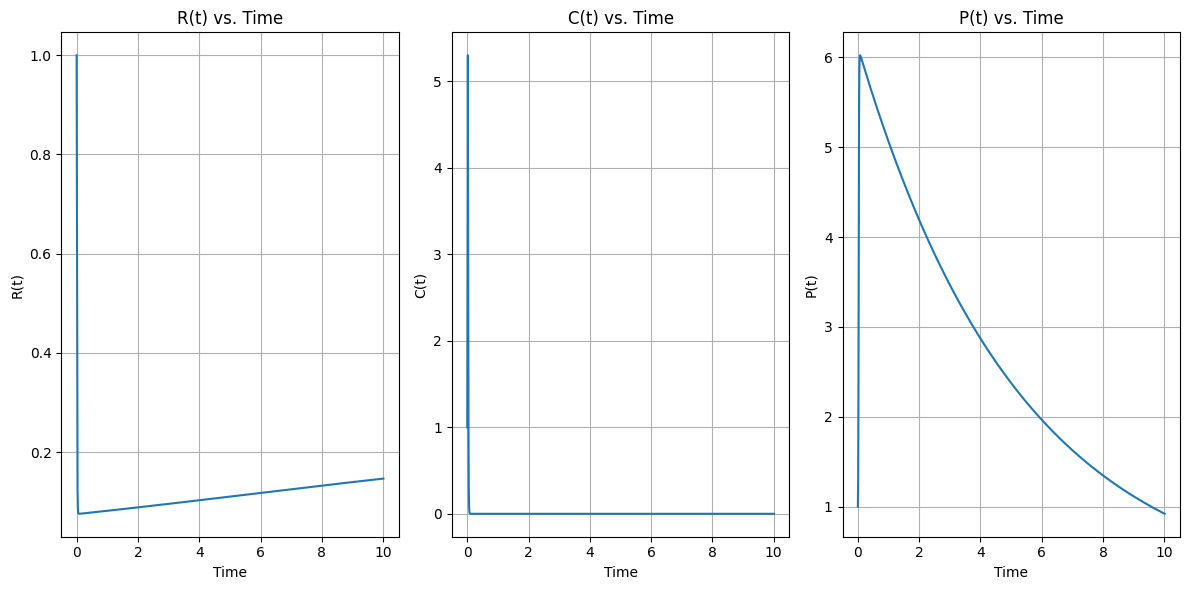

In [33]:
t0 = 0.0
t_end = 10.0
h = 0.01  # Time step

# Initial conditions
R0 = 1.0
C0 = 1.0
P0 = 1.0

# Lists to store the results
t_values = [t0]
R_values = [R0]
C_values = [C0]
P_values = [P0]

# Solve the ODEs using RK4
t = t0
R = R0
C = C0
P = P0

while t < t_end:
    # RK4 step for each variable
    k1_R = h * R_dash(R, C)
    k1_C = h * C_dash(R, C, P)
    k1_P = h * P_dash(C, P)

    k2_R = h * R_dash(R + 0.5 * k1_R, C + 0.5 * k1_C)
    k2_C = h * C_dash(R + 0.5 * k1_R, C + 0.5 * k1_C, P + 0.5 * k1_P)
    k2_P = h * P_dash(C + 0.5 * k1_C, P + 0.5 * k1_P)

    k3_R = h * R_dash(R + 0.5 * k2_R, C + 0.5 * k2_C)
    k3_C = h * C_dash(R + 0.5 * k2_R, C + 0.5 * k2_C, P + 0.5 * k2_P)
    k3_P = h * P_dash(C + 0.5 * k2_C, P + 0.5 * k2_P)

    k4_R = h * R_dash(R + k3_R, C + k3_C)
    k4_C = h * C_dash(R + k3_R, C + k3_C, P + k3_P)
    k4_P = h * P_dash(C + k3_C, P + k3_P)

    # Update variables
    R = R + (k1_R + 2 * k2_R + 2 * k3_R + k4_R) / 6
    C = C + (k1_C + 2 * k2_C + 2 * k3_C + k4_C) / 6
    P = P + (k1_P + 2 * k2_P + 2 * k3_P + k4_P) / 6
    t = t + h

    # Append results to lists
    t_values.append(t)
    R_values.append(R)
    C_values.append(C)
    P_values.append(P)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(t_values, R_values, label='R(t)')
plt.xlabel('Time')
plt.ylabel('R(t)')
plt.title('R(t) vs. Time')
plt.grid(True)

plt.subplot(132)
plt.plot(t_values, C_values, label='C(t)')
plt.xlabel('Time')
plt.ylabel('C(t)')
plt.title('C(t) vs. Time')
plt.grid(True)

plt.subplot(133)
plt.plot(t_values, P_values, label='P(t)')
plt.xlabel('Time')
plt.ylabel('P(t)')
plt.title('P(t) vs. Time')
plt.grid(True)

plt.tight_layout()
plt.show()